In [20]:
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [3]:
df = pd.read_csv('구매데이터.csv')

In [4]:
df.shape

(203, 1)

In [5]:
df.head(10)

,1. 어떤 상품을 구매하셨나요? (모두 선택해주세요!)
0,악세서리 (위의 항목들을 제외한 나머지 품목)
1,"트레이닝 용품 (추리닝, 바람막이 등 유니폼이 아닌 의류)"
2,"유니폼, 마킹류 (선수이름 + 등번호, 스폰서 마킹 등), 머플러"
3,"구매하지 않음, 홈 유니폼, 응원 용품 (깃발, 부부젤라, 벌룬 등), 머플러"
4,머플러
5,"홈 유니폼, 마킹류 (선수이름 + 등번호, 스폰서 마킹 등), 악세서리 (위의 항목..."
6,"홈 유니폼, 어웨이 유니폼, 마킹류 (선수이름 + 등번호, 스폰서 마킹 등), 머플..."
7,머플러
8,"홈 유니폼, 마킹류 (선수이름 + 등번호, 스폰서 마킹 등), 트레이닝 용품 (추리..."
9,"홈 유니폼, 마킹류 (선수이름 + 등번호, 스폰서 마킹 등)"


In [6]:
df.rename(columns = {'1. 어떤 상품을 구매하셨나요? (모두 선택해주세요!)':'col'}, inplace = True)

### "구매하지 않음" 삭제

In [7]:
df['col'] = df['col'].apply(lambda x: str(x).strip('구매하지 않음,'))

### 괄호와 괄호 안의 단어 삭제

In [8]:
df['col'] = df['col'].apply(lambda x: re.sub(pattern = r'\([^)]*\)', repl = '',
                                             string = str(x)).split(sep = ','))

In [9]:
df.head(10)

,col
0,[악세서리 ]
1,[트레이닝 용품 ]
2,"[유니폼, 마킹류 , 머플러]"
3,"[홈 유니폼, 응원 용품 , 머플러]"
4,[머플러]
5,"[홈 유니폼, 마킹류 , 악세서리 ]"
6,"[홈 유니폼, 어웨이 유니폼, 마킹류 , 머플러, 악세서리 ]"
7,[머플러]
8,"[홈 유니폼, 마킹류 , 트레이닝 용품 , 머플러]"
9,"[홈 유니폼, 마킹류 ]"


In [10]:
df['col'].value_counts()

[홈 유니폼,  마킹류 ,  머플러]                                                   31
[홈 유니폼,  어웨이 유니폼,  마킹류 ,  머플러,  악세서리 ]                                 17
[홈 유니폼,  마킹류 ,  머플러,  악세서리 ]                                           17
[머플러]                                                                  12
[홈 유니폼,  마킹류 ]                                                         11
[]                                                                     10
[악세서리 ]                                                                 8
[홈 유니폼,  어웨이 유니폼,  마킹류 ]                                                7
[홈 유니폼,  어웨이 유니폼,  마킹류 ,  트레이닝 용품 ,  머플러,  악세서리 ]                       7
[홈 유니폼,  어웨이 유니폼,  마킹류 ,  머플러]                                          7
[홈 유니폼,  마킹류 ,  악세서리 ]                                                  6
[홈 유니폼,  마킹류 ,  트레이닝 용품 ,  머플러]                                         6
[홈 유니폼]                                                                 5
[홈 유니폼,  어웨이 유니폼,  마킹류 ,  악세서리 ]      

In [11]:
df.shape

(203, 1)

### 구매하지 않음 행 삭제

In [12]:
for i, item in enumerate(df['col']):
    for j in item:
        if j == '':
            df.drop(i, axis = 0, inplace = True)    
df.shape

(193, 1)

### 리스트 안 요소의 공백 제거

In [13]:
df['col'] = df['col'].apply(lambda x: [item.replace(' ','') for item in x])

In [14]:
df.reset_index(inplace = True)

In [15]:
df.drop(['index'], axis = 1, inplace = True)

In [16]:
df.head(10)

,col
0,[악세서리]
1,[트레이닝용품]
2,"[유니폼, 마킹류, 머플러]"
3,"[홈유니폼, 응원용품, 머플러]"
4,[머플러]
5,"[홈유니폼, 마킹류, 악세서리]"
6,"[홈유니폼, 어웨이유니폼, 마킹류, 머플러, 악세서리]"
7,[머플러]
8,"[홈유니폼, 마킹류, 트레이닝용품, 머플러]"
9,"[홈유니폼, 마킹류]"


In [17]:
item_list = []
for index, item in enumerate(df['col']):
    # print(index,item)
    for items in item:
        # print(items)
        item_list.append(items)
len(item_list)

653

In [21]:
item_count = Counter(item_list)

In [22]:
item_count

Counter({'악세서리': 83,
         '트레이닝용품': 28,
         '유니폼': 1,
         '마킹류': 151,
         '머플러': 136,
         '홈유니폼': 160,
         '응원용품': 24,
         '어웨이유니폼': 63,
         '아동유니폼': 7})

In [23]:
count_df = pd.DataFrame(data = [item_count])

In [24]:
count_df

,악세서리,트레이닝용품,유니폼,마킹류,머플러,홈유니폼,응원용품,어웨이유니폼,아동유니폼
0,83,28,1,151,136,160,24,63,7


In [25]:
# 설문 조사 답변 오류값 제거

count_df.drop('유니폼', axis = 1, inplace = True)

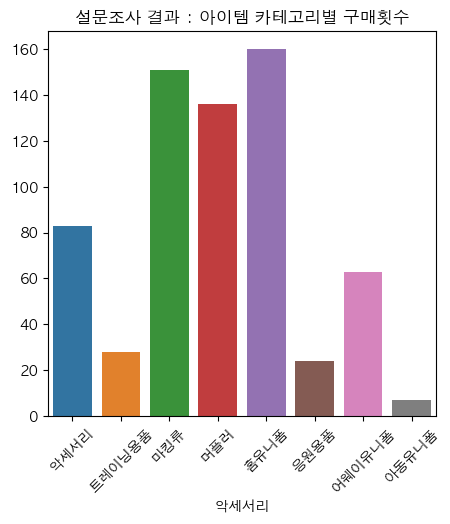

In [27]:
plt.rcParams['font.family'] = 'AppleGothic'
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data = count_df, ax = ax)
plt.xlabel(count_df.columns[0])
plt.xticks(rotation = 45)
plt.title('설문조사 결과 : 아이템 카테고리별 구매횟수')
plt.show()

In [28]:
item_count.pop('유니폼')

1

In [29]:
item_count.values()

dict_values([83, 28, 151, 136, 160, 24, 63, 7])

Text(0.5, 1.0, '아이템 카테고리별 구매 비율')

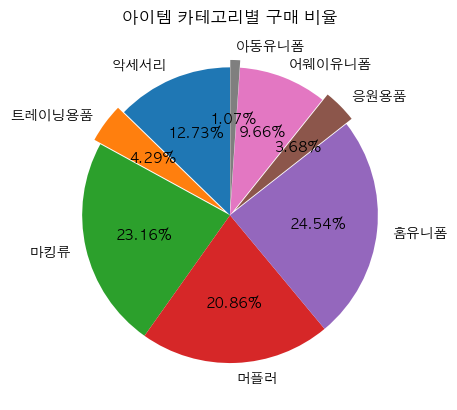

In [30]:
explode = [0.05 if value < 50 else 0 for value in item_count.values()]


plt.pie(item_count.values(), labels = item_count.keys(), autopct = '%1.2f%%', startangle = 90, counterclock = True, explode = explode)
plt.title('아이템 카테고리별 구매 비율')

In [33]:
# 유니폼, 마킹 동시 구매 
for index,item in enumerate(df['col']):
    for j in item:
        if (j == '홈유니폼' or j == '어웨이유니폼') and j == '마킹류':
            print(index, j)

### 유니폼 + 마킹 구매 비율 찾기

In [34]:
num = 0     # 유니폼
num_2 = 0   # 유니폼 + 마킹 구매
num_3 = 0   # 유니폼만 구매
num_4 = 0   # 마킹만 구매
for index,item in enumerate(df['col']):
    # 유니폼
    if ('홈유니폼' in item) or ('어웨이유니폼' in item) or ('유니폼' in item) or ('아동유니폼' in item):
        num += 1
        # 유니폼 + 마킹
        if '마킹류' in item:
            num_2 += 1
        # 유니폼만 구매
        else:
            num_3 += 1
    # 마킹만
    elif ('마킹류' in item):
        num_4 += 1

print('유니폼 구매:{}'.format(num),'\n')
print('유니폼 구매한 사람이 마킹까지:{}'.format(num_2))
print('유니폼만 구매:{}'.format(num_3))
print('마킹까지 구매 비율:{0:.2f}'.format(num_2/num),'\n')
print('마킹만 구매:{}'.format(num_4))

유니폼 구매:167 

유니폼 구매한 사람이 마킹까지:149
유니폼만 구매:18
마킹까지 구매 비율:0.89 

마킹만 구매:2


### 유니폼, 마킹 구매 비율 시각화

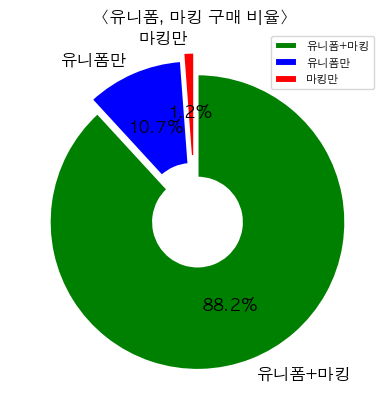

In [35]:
data = [num_2, num_3, num_4]
label = ['유니폼+마킹', '유니폼만', '마킹만']
explode = [0.05, 0.05, 0.1]
colors = ['#008000', '#0000FF', '#FF0000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1.5}

plt.rcParams['font.family'] = 'AppleGothic'
plt.pie(data, labels = label, autopct = '%.1f%%', startangle = 90, counterclock = False, explode = explode, colors = colors,
       wedgeprops = wedgeprops, textprops = {'size':12},
)
plt.title('<유니폼, 마킹 구매 비율>')
plt.legend(loc = 'best', fontsize = 8)
plt.show()

### 최대 구매 개수 선정

In [36]:
list_len = []
for item in df['col']:
    len_item = len(item)
    list_len.append(len_item)
    
print('최대구매개수: ', np.max(list_len))
print('평균구매개수: ', np.mean(list_len))

최대구매개수:  8
평균구매개수:  3.383419689119171


In [37]:
muffler = ['FC서울SoulofSeoul니트머플러','FC서울브랜딩니트머플러','FC서울WHITE니트머플러','레트로전사머플러','40주년기념극세사머플러','40주년기념머플러']
acc = ['선수단볼캡블랙','선수단동계비니','40주년백구','선수단신발주머니','FC서울포토레인보우','유니폼뱃지','엠블럼뱃지','레터링뱃지']
training = ['입장용트랙탑','레인자켓','패딩수트상의','선수단롱다운','패딩베스트','이동복상의','트레이닝상의','바람막이피스테','연습복긴팔','연습복반팔','폴로티긴팔','폴로티반팔','트레이닝하의','연습복반바지']

In [38]:
product_dict = {'홈':{'prob':0.314814815,'list':['홈']},
                '어웨이':{'prob':0.131944444,'list':['어웨이']},
                '머플러':{'prob':0.261574074,'list':muffler},
                '트레이닝':{'prob':0.055555556,'list':training},
                '응원용품':{'prob':0.048611111,'list':['FC서울 벌룬','FC서울 응원깃발']},
                '아동유니폼':{'prob':0.013888889,'list':['아동유니폼']},
                '악세서리':{'prob':0.168981481,'list':acc},
                '마킹':{'prob':0.00462963,'list':['마킹']}}
# product_dict의 마킹은 마킹'만' 단독구매한 경우

In [39]:
prob = np.array([value['prob'] for value in product_dict.values()])
prob /= prob.sum()

random_data = np.random.choice(list(product_dict.keys()), size = 100000, p = prob)

final_list = []

for item in random_data:
    element_list = product_dict[item]['list']
    a = random.choice(element_list)
    final_list.append(a)

In [40]:
# 카테고리별 분석
prob = np.array([value['prob'] for value in product_dict.values()])
prob /= prob.sum()

random_data_cat = np.random.choice(list(product_dict.keys()), size = 100000, p = prob)

category_list = []

for item in random_data_cat:
    category_list.append(item)
category_list

['홈',
 '머플러',
 '머플러',
 '홈',
 '어웨이',
 '머플러',
 '머플러',
 '홈',
 '아동유니폼',
 '응원용품',
 '응원용품',
 '홈',
 '악세서리',
 '머플러',
 '어웨이',
 '홈',
 '악세서리',
 '어웨이',
 '악세서리',
 '악세서리',
 '홈',
 '머플러',
 '머플러',
 '머플러',
 '홈',
 '어웨이',
 '머플러',
 '머플러',
 '악세서리',
 '응원용품',
 '악세서리',
 '홈',
 '홈',
 '홈',
 '응원용품',
 '머플러',
 '악세서리',
 '홈',
 '홈',
 '어웨이',
 '홈',
 '머플러',
 '홈',
 '머플러',
 '응원용품',
 '악세서리',
 '악세서리',
 '응원용품',
 '트레이닝',
 '홈',
 '악세서리',
 '아동유니폼',
 '머플러',
 '머플러',
 '홈',
 '홈',
 '악세서리',
 '어웨이',
 '홈',
 '머플러',
 '머플러',
 '홈',
 '트레이닝',
 '트레이닝',
 '악세서리',
 '트레이닝',
 '홈',
 '홈',
 '머플러',
 '홈',
 '홈',
 '머플러',
 '악세서리',
 '홈',
 '어웨이',
 '홈',
 '응원용품',
 '악세서리',
 '홈',
 '트레이닝',
 '홈',
 '머플러',
 '홈',
 '마킹',
 '악세서리',
 '홈',
 '머플러',
 '홈',
 '홈',
 '어웨이',
 '어웨이',
 '악세서리',
 '응원용품',
 '어웨이',
 '머플러',
 '악세서리',
 '악세서리',
 '홈',
 '응원용품',
 '어웨이',
 '악세서리',
 '악세서리',
 '트레이닝',
 '어웨이',
 '어웨이',
 '악세서리',
 '홈',
 '홈',
 '어웨이',
 '머플러',
 '응원용품',
 '홈',
 '트레이닝',
 '홈',
 '악세서리',
 '머플러',
 '머플러',
 '홈',
 '홈',
 '응원용품',
 '머플러',
 '홈',
 '홈',
 '머플러',
 '홈',
 '머플러',
 '어웨이',
 '어웨이',
 '어웨이',
 '악세서리'

In [41]:
# 요소별 개수 세기
element_counts = Counter(final_list)

element_counts_sorted = dict(sorted(element_counts.items(), key = lambda item : item[1], reverse = True))


# 비율 계산
total_elements = len(final_list)
element_ratios = {element: count / total_elements for element, count in element_counts.items()}
element_ratios_sorted = dict(sorted(element_ratios.items(), key = lambda item : item[1], reverse = True))

print(element_counts_sorted)
print(element_ratios_sorted)

{'홈': 31278, '어웨이': 13339, 'FC서울브랜딩니트머플러': 4476, '40주년기념머플러': 4395, 'FC서울SoulofSeoul니트머플러': 4372, 'FC서울WHITE니트머플러': 4358, '레트로전사머플러': 4343, '40주년기념극세사머플러': 4338, 'FC서울 응원깃발': 2539, 'FC서울 벌룬': 2364, 'FC서울포토레인보우': 2159, '선수단동계비니': 2158, '레터링뱃지': 2127, '유니폼뱃지': 2123, '엠블럼뱃지': 2099, '선수단신발주머니': 2077, '선수단볼캡블랙': 2055, '40주년백구': 2035, '아동유니폼': 1383, '마킹': 472, '트레이닝하의': 436, '패딩수트상의': 415, '트레이닝상의': 412, '폴로티긴팔': 410, '연습복긴팔': 404, '연습복반팔': 395, '레인자켓': 395, '폴로티반팔': 392, '선수단롱다운': 391, '연습복반바지': 383, '패딩베스트': 381, '이동복상의': 378, '입장용트랙탑': 363, '바람막이피스테': 355}
{'홈': 0.31278, '어웨이': 0.13339, 'FC서울브랜딩니트머플러': 0.04476, '40주년기념머플러': 0.04395, 'FC서울SoulofSeoul니트머플러': 0.04372, 'FC서울WHITE니트머플러': 0.04358, '레트로전사머플러': 0.04343, '40주년기념극세사머플러': 0.04338, 'FC서울 응원깃발': 0.02539, 'FC서울 벌룬': 0.02364, 'FC서울포토레인보우': 0.02159, '선수단동계비니': 0.02158, '레터링뱃지': 0.02127, '유니폼뱃지': 0.02123, '엠블럼뱃지': 0.02099, '선수단신발주머니': 0.02077, '선수단볼캡블랙': 0.02055, '40주년백구': 0.02035, '아동유니폼': 0.01383, '마킹': 0.00472, '트레이닝하의': 0.00436, '패딩수트

In [42]:
element_counts_sorted

{'홈': 31278,
 '어웨이': 13339,
 'FC서울브랜딩니트머플러': 4476,
 '40주년기념머플러': 4395,
 'FC서울SoulofSeoul니트머플러': 4372,
 'FC서울WHITE니트머플러': 4358,
 '레트로전사머플러': 4343,
 '40주년기념극세사머플러': 4338,
 'FC서울 응원깃발': 2539,
 'FC서울 벌룬': 2364,
 'FC서울포토레인보우': 2159,
 '선수단동계비니': 2158,
 '레터링뱃지': 2127,
 '유니폼뱃지': 2123,
 '엠블럼뱃지': 2099,
 '선수단신발주머니': 2077,
 '선수단볼캡블랙': 2055,
 '40주년백구': 2035,
 '아동유니폼': 1383,
 '마킹': 472,
 '트레이닝하의': 436,
 '패딩수트상의': 415,
 '트레이닝상의': 412,
 '폴로티긴팔': 410,
 '연습복긴팔': 404,
 '연습복반팔': 395,
 '레인자켓': 395,
 '폴로티반팔': 392,
 '선수단롱다운': 391,
 '연습복반바지': 383,
 '패딩베스트': 381,
 '이동복상의': 378,
 '입장용트랙탑': 363,
 '바람막이피스테': 355}

In [43]:
counts_df = pd.DataFrame(data = element_counts_sorted, columns = ['구매개수'], index = element_counts_sorted.keys())

In [44]:
counts_df['구매개수'] = element_counts_sorted.values()

In [45]:
counts_df

,구매개수
홈,31278
어웨이,13339
FC서울브랜딩니트머플러,4476
40주년기념머플러,4395
FC서울SoulofSeoul니트머플러,4372
FC서울WHITE니트머플러,4358
레트로전사머플러,4343
40주년기념극세사머플러,4338
FC서울 응원깃발,2539
FC서울 벌룬,2364


In [46]:
len(element_counts_sorted)

34

In [50]:
# 비율 총합 1 확인
value_list = []
for value in element_ratios.values():
    value_list.append(value)
round(np.sum(value_list), 4)

1.0

## 10,000개의 고객 데이터 생성

In [51]:
store = []
for i in range(1, 10001):
    for j in range(random.randint(1, 9)):
        randsample = random.sample(final_list, j)
        
        # 유니폼 구매한 경우 89%가 마킹까지 구매
        if '홈' in randsample or '어웨이' in randsample or '아동유니폼' in randsample:
            if random.random() < 0.89:
                randsample.append('마킹')
    store.append(randsample)
df = pd.DataFrame(store)

In [52]:
df

,0,1,2,3,4,5,6,7,8
0,None,None,None,None,None,None,None,None,None
1,홈,40주년기념극세사머플러,마킹,None,None,None,None,None,None
2,유니폼뱃지,선수단동계비니,선수단롱다운,None,None,None,None,None,None
3,FC서울브랜딩니트머플러,FC서울SoulofSeoul니트머플러,유니폼뱃지,None,None,None,None,None,None
4,FC서울WHITE니트머플러,홈,연습복반바지,FC서울 응원깃발,레트로전사머플러,트레이닝하의,홈,마킹,None
...,...,...,...,...,...,...,...,...,...
9995,연습복긴팔,홈,레트로전사머플러,레터링뱃지,홈,마킹,None,None,None
9996,연습복긴팔,None,None,None,None,None,None,None,None
9997,선수단동계비니,홈,홈,FC서울WHITE니트머플러,홈,마킹,None,None,None
9998,40주년기념극세사머플러,연습복긴팔,FC서울 응원깃발,어웨이,엠블럼뱃지,FC서울 응원깃발,홈,마킹,None
